# **Problem and Algortithm**
Terdapat food delivery dataset yang digunakan untuk mengukur perbandingan antara jumlah order dengan jumlah biaya order makanan per customer, maka algoritma untuk menentukannya yaitu:


*   Import dataset
*   Tambahkan kolom total_fee pada dataset
*   Cleaning dataset dengan status completed
*   Tambahkan kolom total_order
*   Urutkan kolom total_fee dari yang terkecil
*   Visualisasi data










## 1. Connect GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## 3. Import Data

In [ ]:
path = 'gdrive/MyDrive/DATA/Food Delivery/'

In [ ]:
os.listdir(path)

['food_delivery_datasets.csv']

In [ ]:
df = pd.read_csv(path + 'food_delivery_datasets.csv')

In [ ]:
df.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587


## 4. Tambahkan Kolom Total Biaya



In [ ]:
df['total_fee']=df['food_price']+df['delivery_fee']-df['voucher_amount']

In [ ]:
df.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id,total_fee
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149,22900
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936,160000
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026,52800
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377,53900
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587,81700


In [ ]:
df=pd.concat([df['cust_id'],df['total_fee'],df['status']], axis=1)
df.columns = ['cust_id','total_fee','status']
df.head()

,cust_id,total_fee,status
0,1089034,22900,Completed
1,180146,160000,Completed
2,366528,52800,Completed
3,511038,53900,Completed
4,1220358,81700,Completed


## 5. Cleaning Data dengan Status Completed

In [ ]:
df['status'].unique()

array(['Completed', 'Cancelled'], dtype=object)

In [ ]:
df=df[df.status=='Completed']
df.reset_index(drop=True)

,cust_id,total_fee,status
0,1089034,22900,Completed
1,180146,160000,Completed
2,366528,52800,Completed
3,511038,53900,Completed
4,1220358,81700,Completed
...,...,...,...
876,1296335,107200,Completed
877,1135466,147700,Completed
878,1383625,192200,Completed
879,1094787,58300,Completed


## 6. Tambahkan Kolom Total Order

In [ ]:
df1=df.groupby(['cust_id'])
df1=df1[['total_fee']].sum()
df1['total_order']=df.groupby(['cust_id']).size()
df1.reset_index()

,cust_id,total_fee,total_order
0,22895,34500,1
1,59565,430600,3
2,62551,224800,3
3,70701,430700,3
4,82690,156700,5
...,...,...,...
131,1510407,67000,1
132,1514562,1005900,11
133,1542763,252700,4
134,1544551,490900,4


## 7. Urutkan Kolom Total Biaya dari yang terkecil

In [ ]:
A=[]
for i in range (1,137):
  A.append(i)
  i+=1

In [ ]:
final_df1=df1.sort_values(by='total_fee',ascending=True)
final_df1['Customer_ID']=A
final_df1.reset_index()

,cust_id,total_fee,total_order,Customer_ID
0,783781,17800,1,1
1,1081470,25100,1,2
2,1470304,31800,1,3
3,22895,34500,1,4
4,185166,60100,1,5
...,...,...,...,...
131,366721,2201000,25,132
132,366528,2280500,24,133
133,1379631,2424500,12,134
134,1383625,2532500,19,135


## 8. Visualisasi Data

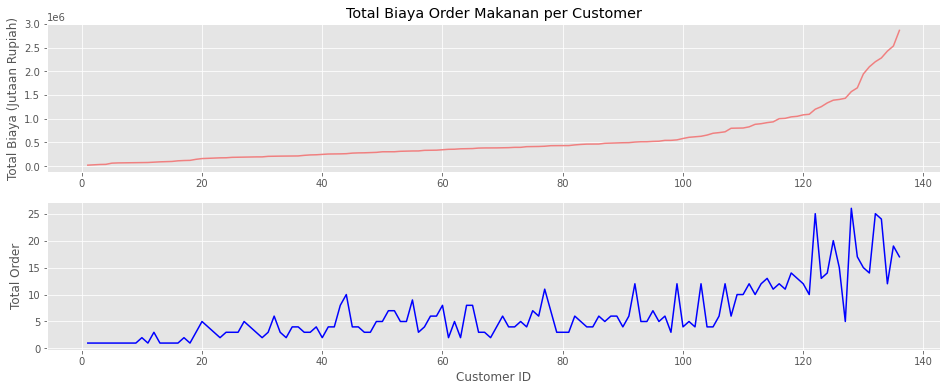

In [ ]:
%matplotlib inline

plt.style.use('ggplot')

X = final_df1['Customer_ID']
Y = final_df1['total_fee']
Y1 = final_df1['total_order']
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(16,6))

ax[0].plot(X, Y, color='lightcoral')
ax[0].set_title('Total Biaya Order Makanan per Customer')
ax[0].set_ylabel('Total Biaya (Jutaan Rupiah)')

ax[1].plot(X, Y1, color='blue')
ax[1].set_xlabel('Customer ID')
ax[1].set_ylabel('Total Order')

plt.show()

**Insight dari grafik:**
*   Banyaknya biaya yang telah dikeluarkan tiap customer untuk order makanan berbanding lurus dengan banyaknya order makanan tiap customer
*   Customer 783781 merupakan customer yang terkecil dalam mengeluarkan biaya dengan 1 kali order makanan
*   Customer 361927 merupakan customer yang terbesar dalam mengeluarkan biaya dengan 17 kali order makanan






In [ ]:
final_df2=final_df1[final_df1['total_order']>20]
final_df2.reset_index()

,cust_id,total_fee,total_order,Customer_ID
0,316834,1198500,25,122
1,1094787,1569900,26,128
2,366721,2201000,25,132
3,366528,2280500,24,133


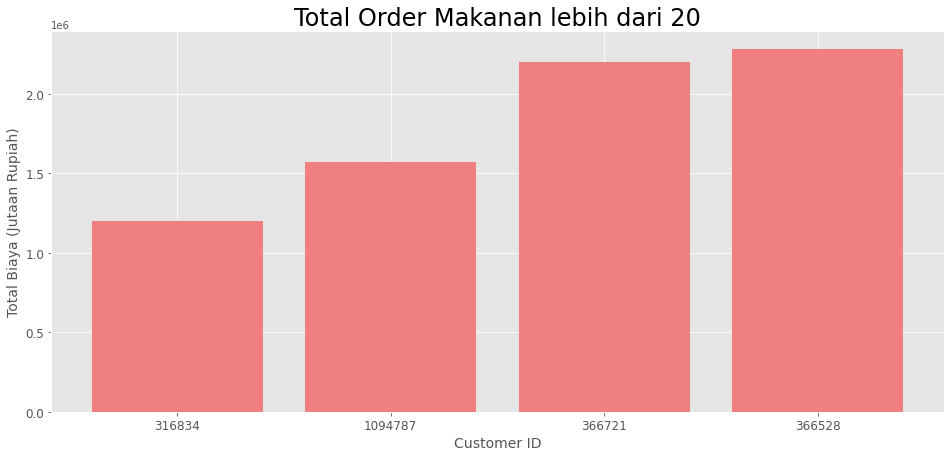

In [ ]:
plt.figure(figsize=(16,7))

cust_id=['316834','1094787','366721','366528']
plt.bar(cust_id, final_df2['total_fee'], color='lightcoral')

plt.title('Total Orderan Makanan lebih dari 20', size=24)
plt.xlabel('Customer ID', size=14)
plt.ylabel('Total Biaya (Jutaan Rupiah)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

**Insight dari grafik:**
Terdapat 4 customer yang telah melakukan order makanan lebih dari 20 kali, yaitu:
*   Customer 316834
*   Customer 1094787
*   Customer 366721
*   Customer 366528



